In [2]:
import numpy as np
import pandas as pd
import random
%matplotlib inline

In [3]:
# Data Generation
# Warning! Boilerplate code
n = 100
x = np.arange(n)
y_stationary = np.random.normal(0, 1, n)

y_nonstationary = [random.random() + (x * .01) for x in range(100)]

df = pd.DataFrame({
    "Stationary": y_stationary,
    "Nonstationary": y_nonstationary
})

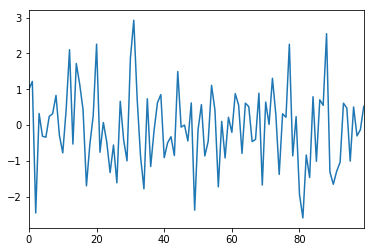

In [4]:
df.Stationary.plot()

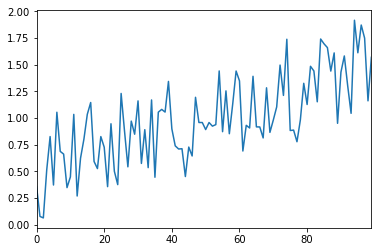

In [5]:
df.Nonstationary.plot()

In [6]:
# Apply the Augmented Dickey-Fuller test to determine if the above is stationary
from statsmodels.tsa.stattools import adfuller
adfuller(df.Stationary)

(-9.722321809730037,
 9.471593327634134e-17,
 0,
 99,
 {'1%': -3.498198082189098,
  '5%': -2.891208211860468,
  '10%': -2.5825959973472097},
 266.3487922435362)

In [7]:
adfuller(df.Nonstationary)

(-0.5856002704638745,
 0.8742026914846726,
 8,
 91,
 {'1%': -3.50434289821397,
  '5%': -2.8938659630479413,
  '10%': -2.5840147047458037},
 38.77795371931202)

# Non-Stationary to Stationary Techniques

### Technique 1: Applying a Percent Change

In [8]:
# Convert to stationary data by taking the `pct_change` of the non-stationary data.
df['Returns'] = df.Nonstationary.pct_change()

In [9]:
# Drop the NaNs created by the pct_change function
df = df.dropna()

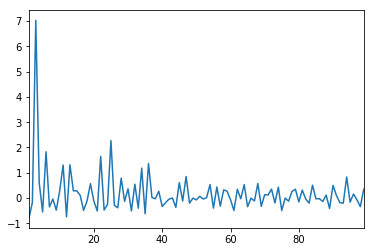

In [10]:
# Plot the returns as a line chart. 
# You should no longer see the upward trend in the data
df.Returns.plot()

### Technique 2: Applying a Diff

In [12]:
# Subtract the upward trend for the non-stationary data using the `diff()` function
df['Diff'] = df.Nonstationary.diff()

In [11]:
# Drop the NaNs created from the diff function
df = df.dropna()

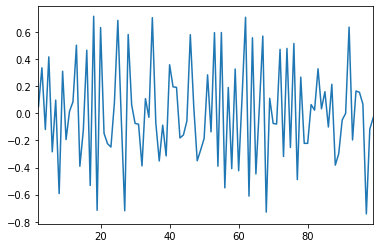

In [12]:
# Plot the 
df.Diff.plot()